In [1]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

from datetime import datetime
# %matplotlib widget

import pandas_ta as ta

In [2]:
df1 = pd.read_json('data.json', lines=True)
df1['time'] = pd.to_datetime(df1['time'], unit='s')
df1.set_index('time', inplace=True)
df1 = df1[df1['symbol']=="LTCUSDT"]


df1 = df1[:'2023-07-03']
df1

,symbol,price
time,,
2023-07-02 10:11:17,LTCUSDT,110.53
2023-07-02 10:11:22,LTCUSDT,110.50
2023-07-02 10:11:27,LTCUSDT,110.41
2023-07-02 10:11:32,LTCUSDT,110.42
2023-07-02 10:11:37,LTCUSDT,110.43
...,...,...
2023-07-03 18:09:01,LTCUSDT,107.59
2023-07-03 18:09:07,LTCUSDT,107.57
2023-07-03 18:09:11,LTCUSDT,107.56


In [3]:
df1.head(2)

,symbol,price
time,,
2023-07-02 10:11:17,LTCUSDT,110.53
2023-07-02 10:11:22,LTCUSDT,110.50


In [4]:
df1.tail(2)

,symbol,price
time,,
2023-07-03 18:09:16,LTCUSDT,107.56
2023-07-03 18:09:21,LTCUSDT,107.54


In [5]:
print(df1['symbol'].unique())
df1['symbol'].value_counts()

['LTCUSDT']


LTCUSDT    23546
Name: symbol, dtype: int64

<Axes: xlabel='time'>

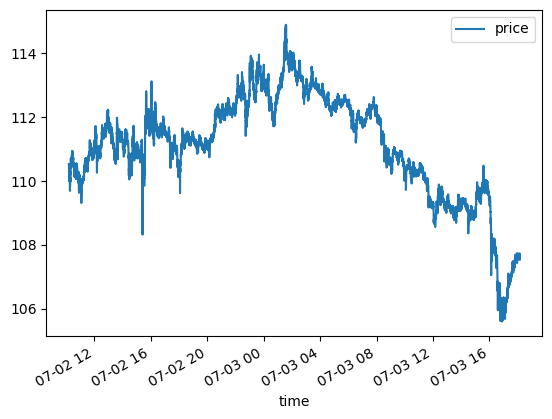

In [6]:
df1[df1['symbol']=="LTCUSDT"].plot()

In [7]:
# df[df['symbol']=="SOLUSDT"].plot()

In [8]:
# df[df['symbol']=="BCHUSDT"].plot()

In [9]:
# !cd freq
# !freqtrade download-data --exchange binance --pairs  SOL/USDT  --timeframes 5m --timerange 20230701-20230710

In [10]:
df2 = pd.read_json('freq/user_data/data/binance/LTC_USDT-5m.json')
df2.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
# convert timestamp to datetime format
df2['timestamp'] = pd.to_datetime(df2['timestamp'], unit='ms')
# set timestamp as index
df2.set_index('timestamp', inplace=True)
df2 = df2['2023-07-02 10:11:14':'2023-07-03 18:09:21']


df2.head()

,open,high,low,close,volume
timestamp,,,,,
2023-07-02 10:15:00,110.43,110.74,109.60,110.52,17019.039
2023-07-02 10:20:00,110.53,110.95,110.40,110.86,5264.016
2023-07-02 10:25:00,110.87,110.95,110.58,110.72,3718.857
2023-07-02 10:30:00,110.69,110.69,110.12,110.30,3971.493
2023-07-02 10:35:00,110.27,110.53,110.09,110.25,3783.180


In [11]:
df2.tail()

,open,high,low,close,volume
timestamp,,,,,
2023-07-03 17:45:00,107.38,107.68,107.25,107.66,4238.610
2023-07-03 17:50:00,107.65,107.69,107.45,107.62,3036.443
2023-07-03 17:55:00,107.62,107.75,107.42,107.70,3970.647
2023-07-03 18:00:00,107.70,107.72,107.52,107.72,1944.215
2023-07-03 18:05:00,107.72,107.74,107.46,107.46,3635.967


In [29]:
fig = go.Figure(data=[go.Candlestick(x=df2.index,
                open=df2['open'],
                high=df2['high'],
                low=df2['low'],
                close=df2['close'])])

tick_data = go.Scatter(x=df1.index, y=df1['price'], mode='lines', name='tick', line_color='#ffe476')
# fig.add_trace(tick_data)

            # ['none', 'tozeroy', 'tozerox', 'tonexty', 'tonextx',
            # 'toself', 'tonext'

fig.update_layout(
    width=1400,  # Set the width to 800 pixels
    height=800  # Set the height to 600 pixels
)

fig.show()

In [36]:
comb_df = pd.concat([df1, df2])
comb_df = comb_df.fillna(method='ffill')
print(comb_df.shape)
comb_df.head()

(23929, 37)


,symbol,price,open,high,low,close,volume,green_candle,red_candle,ema10,...,close_n-3,ema10_n-3,green_candle_n-3,red_candle-3,cond1,cond2,buy,buy_price,stoploss,takeprofit
2023-07-02 10:11:17,LTCUSDT,110.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-02 10:11:22,LTCUSDT,110.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-02 10:11:27,LTCUSDT,110.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-02 10:11:32,LTCUSDT,110.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-02 10:11:37,LTCUSDT,110.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
comb_df.tail()

,symbol,price,open,high,low,close,volume,green_candle,red_candle,ema10,...,close_n-3,ema10_n-3,green_candle_n-3,red_candle-3,cond1,cond2,buy,buy_price,stoploss,takeprofit
2023-07-03 17:45:00,LTCUSDT,107.54,107.38,107.68,107.25,107.66,4238.610,True,False,107.140569,...,107.13,106.825950,True,False,False,False,False,113.76,113.77,113.735
2023-07-03 17:50:00,LTCUSDT,107.54,107.65,107.69,107.45,107.62,3036.443,False,True,107.227738,...,107.50,106.948504,True,False,False,True,False,113.76,113.77,113.735
2023-07-03 17:55:00,LTCUSDT,107.54,107.62,107.75,107.42,107.70,3970.647,True,False,107.313604,...,107.37,107.025140,False,True,False,False,False,113.76,113.77,113.735
2023-07-03 18:00:00,LTCUSDT,107.54,107.70,107.72,107.52,107.72,1944.215,True,False,107.387494,...,107.66,107.140569,True,False,False,False,False,113.76,113.77,113.735
2023-07-03 18:05:00,LTCUSDT,107.54,107.72,107.74,107.46,107.46,3635.967,False,True,107.400677,...,107.62,107.227738,False,True,True,True,True,107.46,107.52,107.310


In [33]:
fig = go.Figure(data=[go.Candlestick(x=df2.index,
                open=df2['open'],
                high=df2['high'],
                low=df2['low'],
                close=df2['close'])])

tick_data = go.Scatter(x=comb_df.index, y=comb_df['price'], mode='lines', name='tick', line_color='#ffe476')
fig.add_trace(tick_data)

fig.update_layout(
    width=1400,  # Set the width to 800 pixels
    height=800  # Set the height to 600 pixels
)

fig.show()

## Making Strategy

In [35]:
def populate_essentials(df, df_tick):
    ## Green Candle
    df['green_candle'] = df['close'] > df['open']
    df['red_candle'] = df['green_candle'] != 1

    ## EMA 10
    df['ema10'] = ta.ema(df.close, timeperiod=10)

    df['open_n-1'] = df['open'].shift()
    df['high_n-1'] = df['high'].shift()
    df['low_n-1'] = df['low'].shift()
    df['close_n-1'] = df['close'].shift()
    df['ema10_n-1'] = df['ema10'].shift()
    df['green_candle_n-1'] = df['green_candle'].shift()
    df['red_candle_n-1'] = df['red_candle'].shift()

    df['open_n-2'] = df['open'].shift(2)
    df['high_n-2'] = df['high'].shift(2)
    df['low_n-2'] = df['low'].shift(2)
    df['close_n-2'] = df['close'].shift(2)
    df['ema10_n-2'] = df['ema10'].shift(2)
    df['green_candle_n-2'] = df['green_candle'].shift(2)
    df['red_candle_n-2'] = df['red_candle'].shift(2)

    df['open_n-3'] = df['open'].shift(3)
    df['high_n-3'] = df['high'].shift(3)
    df['low_n-3'] = df['low'].shift(3)
    df['close_n-3'] = df['close'].shift(3)
    df['ema10_n-3'] = df['ema10'].shift(3)
    df['green_candle_n-3'] = df['green_candle'].shift(3)
    df['red_candle-3'] = df['red_candle'].shift(3)

    # 1. Check market is bullish -> candles above 10 ema (May be multiple green candle above of 10 ema)
    df['cond1'] = ( 
                    (df['low_n-1'] > df['ema10_n-1']) & (df['low_n-2'] > df['ema10_n-2']) &\
                    (df['green_candle_n-1']==True) & (df['green_candle_n-2']==True) 
                ) |\
                (
                    (df['low_n-1'] > df['ema10_n-1']) & (df['low_n-2'] > df['ema10_n-2']) & (df['low_n-3'] > df['ema10_n-3'])&\
                    (df['green_candle_n-1']==False) & (df['green_candle_n-2']==True) & (df['green_candle_n-3']==True) 
                )

    # 2. Previous candle (n-1) is red
    df['cond2'] = ( (df['red_candle']==True) & (df['low'] > df['ema10']) )

    # 2. Previous candle (n-1) is red
    df['cond2'] = ( (df['red_candle']==True) & (df['low'] > df['ema10']) )

    # 3. Current price cross previous candle open
    df['cond3'] = ( df_tick['price']>=df['open'])

    df['buy'] = (df['cond1'] 
                & 
                df['cond2'])
    df['buy_price'] = np.where(df['buy']==1, df['close'], np.nan)
    df['stoploss'] = np.where(df['buy']==1, df['low_n-1'], np.nan)
    df['takeprofit'] = np.where(df['buy']==1, df['close'] + (df['close'] - df['stoploss'])*2.5, np.nan)

    return df


df2 = populate_essentials(df2, comb_df)

fig = go.Figure(data=[go.Candlestick(x=df2.index,
                open=df2['open'],
                high=df2['high'],
                low=df2['low'],
                close=df2['close'])])

# tick_data = go.Scatter(x=df1.index, y=df1['price'], mode='lines', name='tick', line_color='#ffe476')
# fig.add_trace(tick_data)

buy_trace = go.Scatter(x=df2.index, y=df2['buy_price'], mode='markers', name='ema10', line=dict(width=3, color="black"),)
fig.add_trace(buy_trace)

fig.update_layout(
    width=1400,  # Set the width to 800 pixels
    height=800  # Set the height to 600 pixels
)

fig.show()

ValueError: Can only compare identically-labeled Series objects